# Distribution of the model quality of the pisces_multidomain100_identity95_coverage60 dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 100
sns.set(style='darkgrid')
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
from pathlib import Path
score_dir = Path('../../../../score/pisces_multidomain100_identity95_coverage60')
plot_dir = score_dir / 'plot'
plot_dir.mkdir(exist_ok=True)
df_path = score_dir / 'pisces_multidomain100_identity95_coverage60_final.csv'
df = pd.read_csv(df_path, index_col=0).reset_index(drop=True)
df

model  GDT_TS  GDT_HA  TMscore  target  template  seq_len  \
0      1FHU_A_2PS2_A_3_3   0.452   0.265    0.649  1FHU_A  2PS2_A_3      320   
1      1FHU_A_4MGG_A_3_4   0.494   0.309    0.657  1FHU_A  4MGG_A_3      320   
2      1FHU_A_1WUF_A_3_3   0.557   0.353    0.752  1FHU_A  1WUF_A_3      320   
3      1FHU_A_3Q45_A_3_2   0.572   0.370    0.758  1FHU_A  3Q45_A_3      320   
4      1FHU_A_3GC2_A_1_2   0.972   0.865    0.986  1FHU_A  3GC2_A_1      320   
...                  ...     ...     ...      ...     ...       ...      ...   
14035  6RI6_A_5A7E_A_1_3   0.954   0.873    0.982  6RI6_A  5A7E_A_1      498   
14036  6RI6_A_5A7E_A_2_4   0.960   0.886    0.986  6RI6_A  5A7E_A_2      498   
14037  6RI6_A_4A2F_A_1_5   0.955   0.872    0.981  6RI6_A  4A2F_A_1      498   
14038  6RI6_A_2HRG_A_2_1   0.961   0.890    0.985  6RI6_A  2HRG_A_2      498   
14039  6RI6_A_2XYB_A_2_4   0.960   0.878    0.986  6RI6_A  2XYB_A_2      498   

       identity  positive  coverage  ...  Exptl.  resolution  R-factor  \
0            53       102       282  ...    XRAY       1.650     0.200   
1            56       107       278  ...    XRAY       1.650     0.200   
2            54       114       299  ...    XRAY       1.650     0.200   
3            61       108       301  ...    XRAY       1.650     0.200   
4           276       291       319  ...    XRAY       1.650     0.200   
...         ...       ...       ...  ...     ...         ...       ...   
14035       338       387       490  ...    XRAY       0.930     0.110   
14036       335       382       494  ...    XRAY       0.930     0.110   
14037       339       386       490  ...    XRAY       0.930     0.110   
14038       333       383       494  ...    XRAY       0.930     0.110   
14039       330       377       492  ...    XRAY       0.930     0.110   

       FreeRvalue PDB_ID Chain  Domain_num      1       2       3  
0           0.270   1FHU     A           2 14.000 140.000 231.000  
1           0.270   1FHU     A           2 14.000 140.000 231.000  
2           0.270   1FHU     A           2 14.000 140.000 231.000  
3           0.270   1FHU     A           2 14.000 140.000 231.000  
4           0.270   1FHU     A           2 14.000 140.000 231.000  
...           ...    ...   ...         ...    ...     ...     ...  
14035       0.120   6RI6     A           3 96.000 222.000 241.000  
14036       0.120   6RI6     A           3 96.000 222.000 241.000  
14037       0.120   6RI6     A           3 96.000 222.000 241.000  
14038       0.120   6RI6     A           3 96.000 222.000 241.000  
14039       0.120   6RI6     A           3 96.000 222.000 241.000  

[14040 rows x 27 columns]

In [3]:
# Targets with less model than 150
df.groupby('target').filter(lambda x: len(x) < 150).value_counts('target')

target
6FME_B    146
4BVX_A    145
4CFS_A    140
3PJ0_A    140
6HOA_A    138
1FHU_A    134
2BHU_A    125
4TMX_A    121
2HEU_A    116
5V8S_A    109
5DVI_A    102
1ZAR_A    100
1GU7_A     97
2XXG_A     92
5IPY_A     80
4R6H_A     77
4JBE_A     75
4DCU_A     70
3UCQ_A     67
3A09_A     61
5ICQ_A     55
dtype: int64

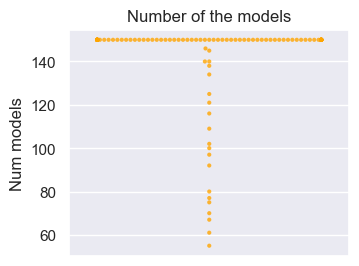

In [4]:
# Distribution of the number of the models for each target
data = df.groupby('target').agg({'model':len}).rename({'model': 'Num models'}, axis=1)
# Distribution of the sequence length
plt.figure(figsize=(4, 3))
# plt.ylim([50, 155])
plt.subplots_adjust(left=0.2)
y = 'Num models'
sns.swarmplot(data=data, y=y, color='orange', alpha=0.8, s=3)
plt.title('Number of the models')
plt.show()

In [5]:
# Identify targets with low model quality
df.groupby('target').filter(lambda x: x['GDT_TS'].max() < 0.7).value_counts('target')

Series([], dtype: int64)

## Sequence length

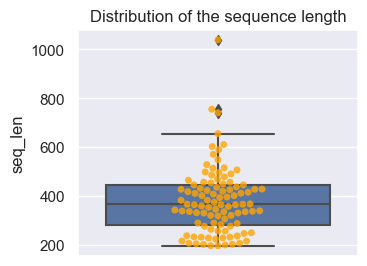

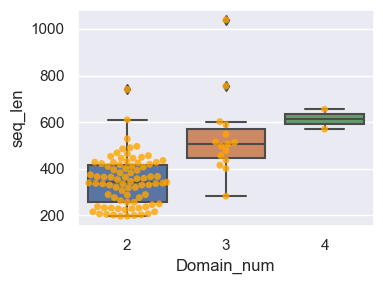

In [6]:
# Distribution of the sequence length
plt.figure(figsize=(4, 3))
plt.subplots_adjust(left=0.2)
target_head_df = df.groupby('target').head(1)
sns.boxplot(data=target_head_df, y='seq_len')
sns.swarmplot(data=target_head_df, y='seq_len', color='orange', alpha=0.8)
plt.title('Distribution of the sequence length')
output_path = plot_dir / 'target_sequence_length_swarmplot.png'
plt.savefig(output_path)
plt.show()
plt.figure(figsize=(4, 3))
x = 'Domain_num'
order = np.sort(df[x].unique())
sns.boxplot(data=target_head_df, x=x, y='seq_len', order=order)
sns.swarmplot(data=target_head_df, x=x, y='seq_len', color='orange', order=order, alpha=0.8)
output_path = plot_dir / 'target_sequence_length_domain_num_swarmplot.png'
plt.tight_layout()
plt.savefig(output_path)
plt.show()

In [7]:
df.groupby('target').head(1).value_counts('Domain_num')

Domain_num
2    83
3    15
4     2
dtype: int64

## Plot GDT_TS

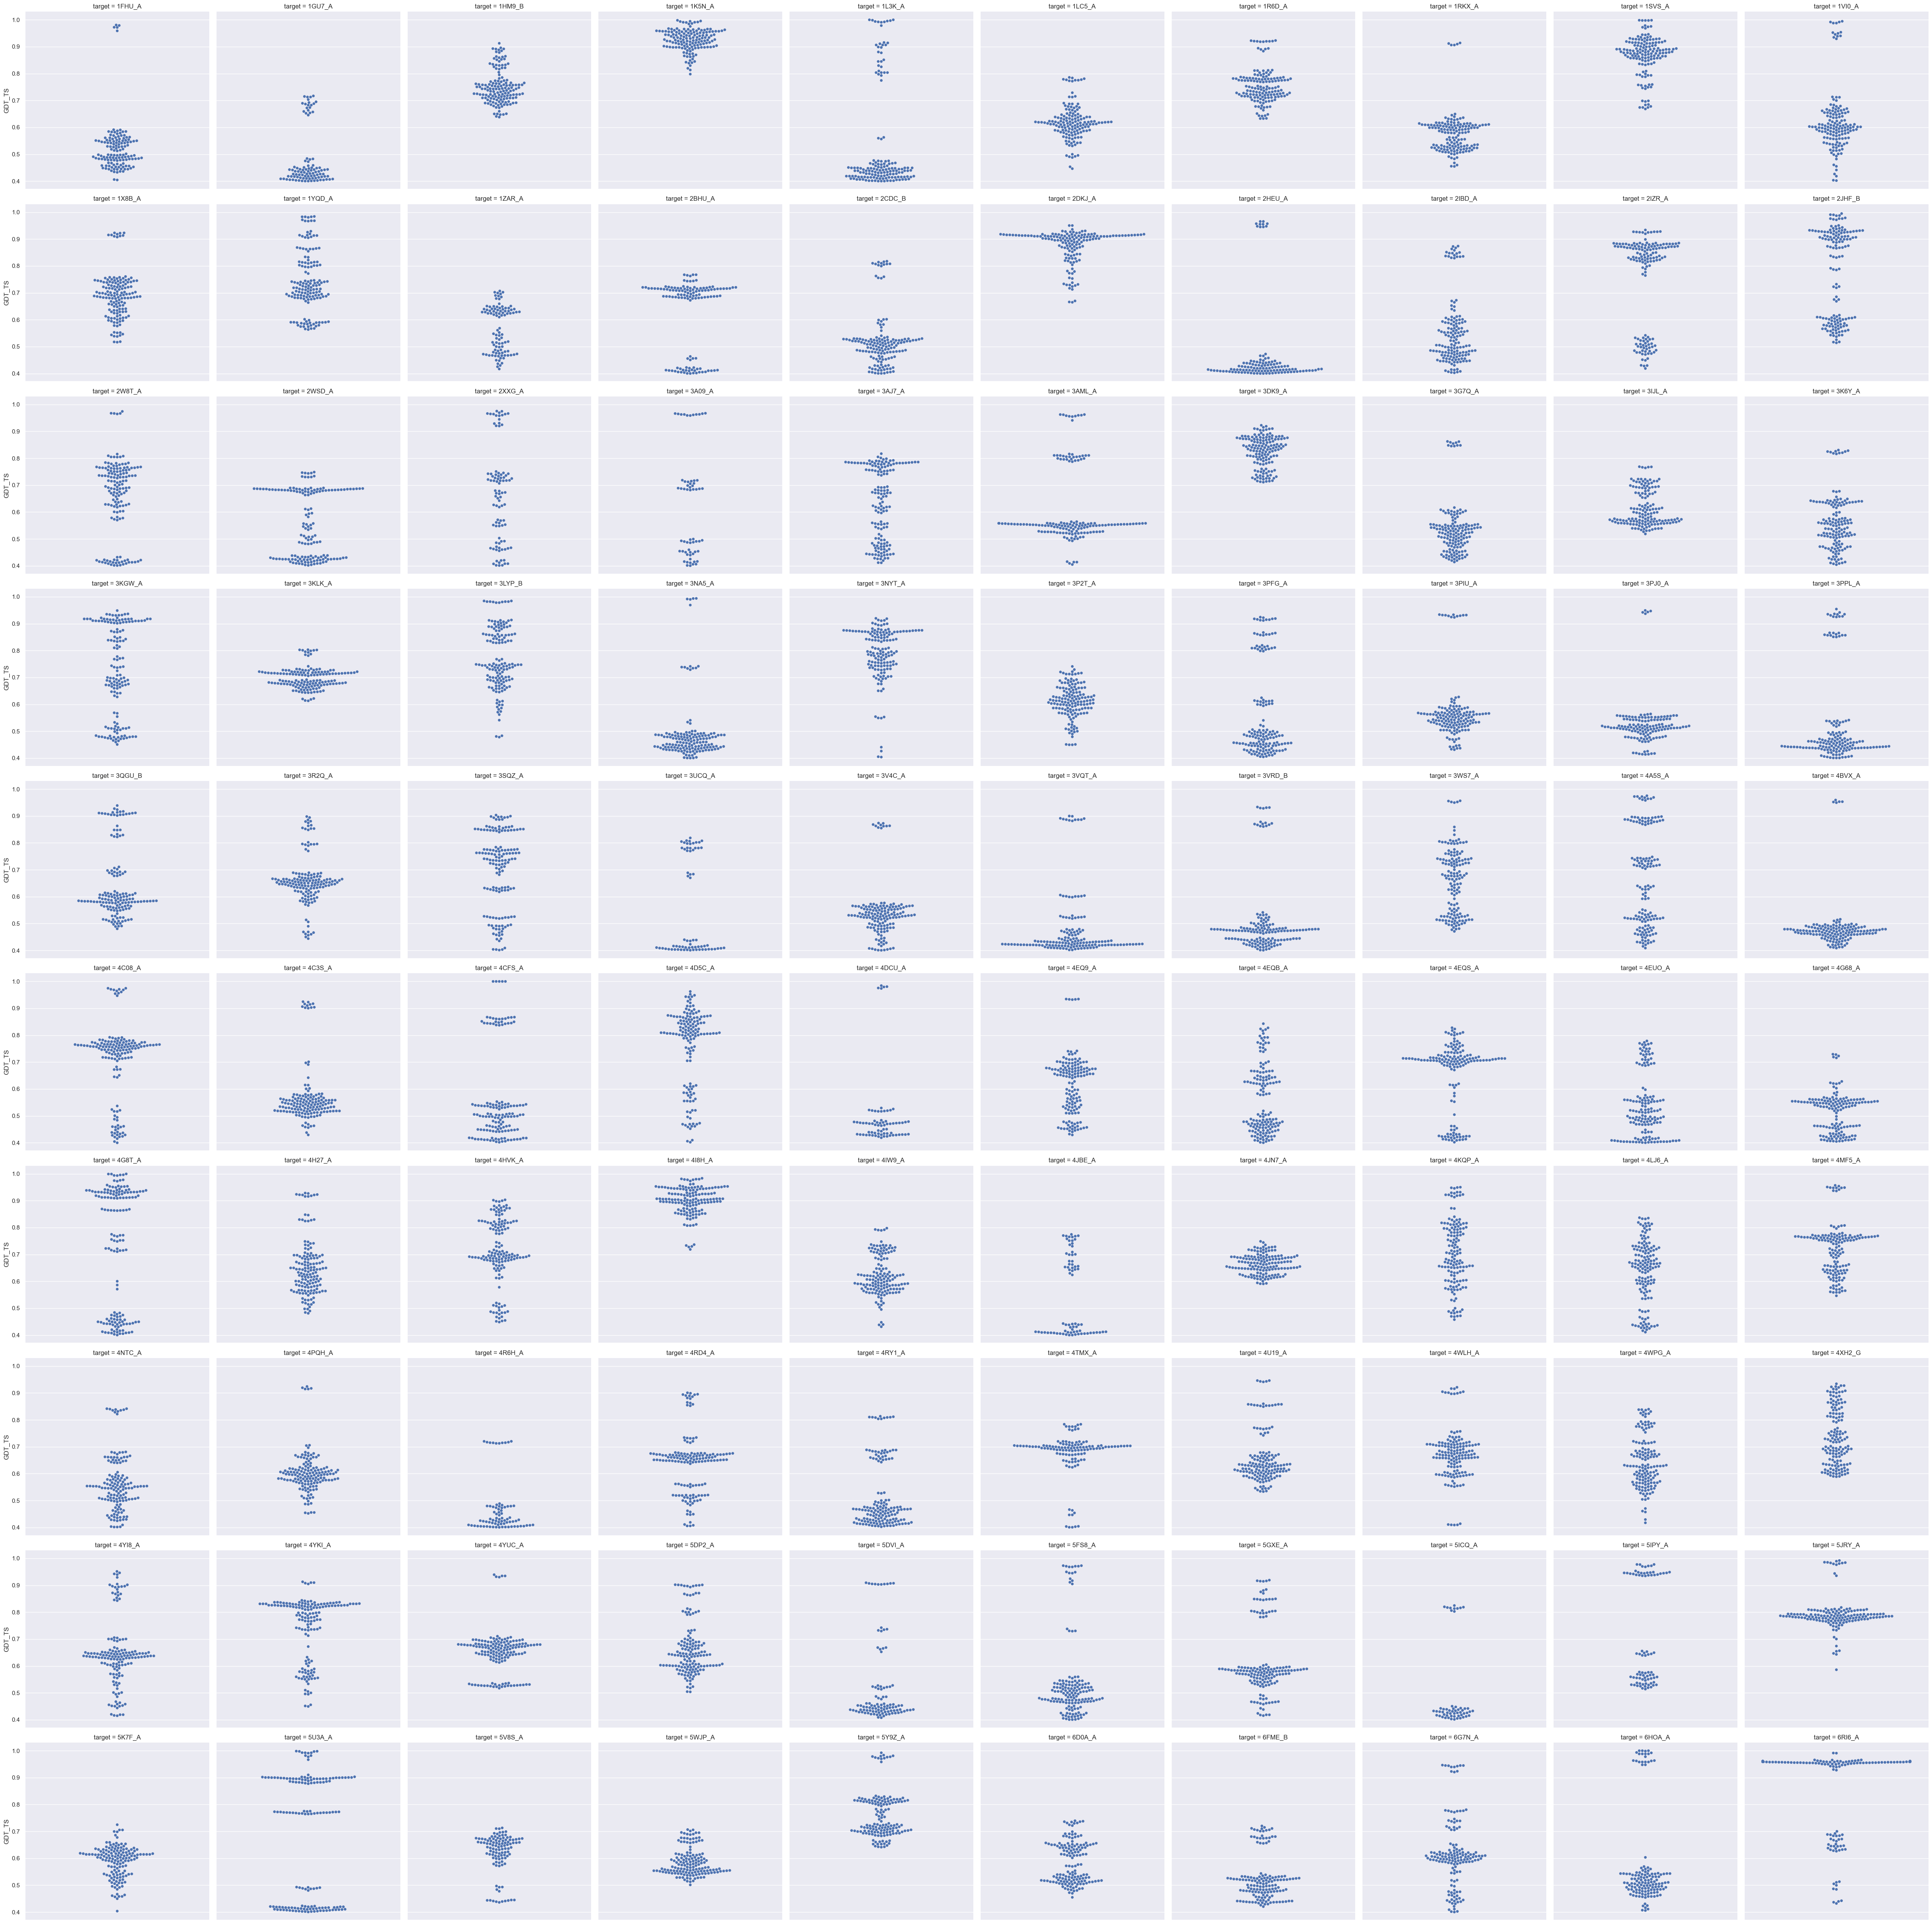

In [8]:
# swarm plot of gdtts
sns.factorplot(data=df, y='GDT_TS', col='target', kind='swarm', col_wrap=10)
output_path = plot_dir / 'gdtts_swarmplot_col10.png'
plt.savefig(output_path)

## An example of distribution

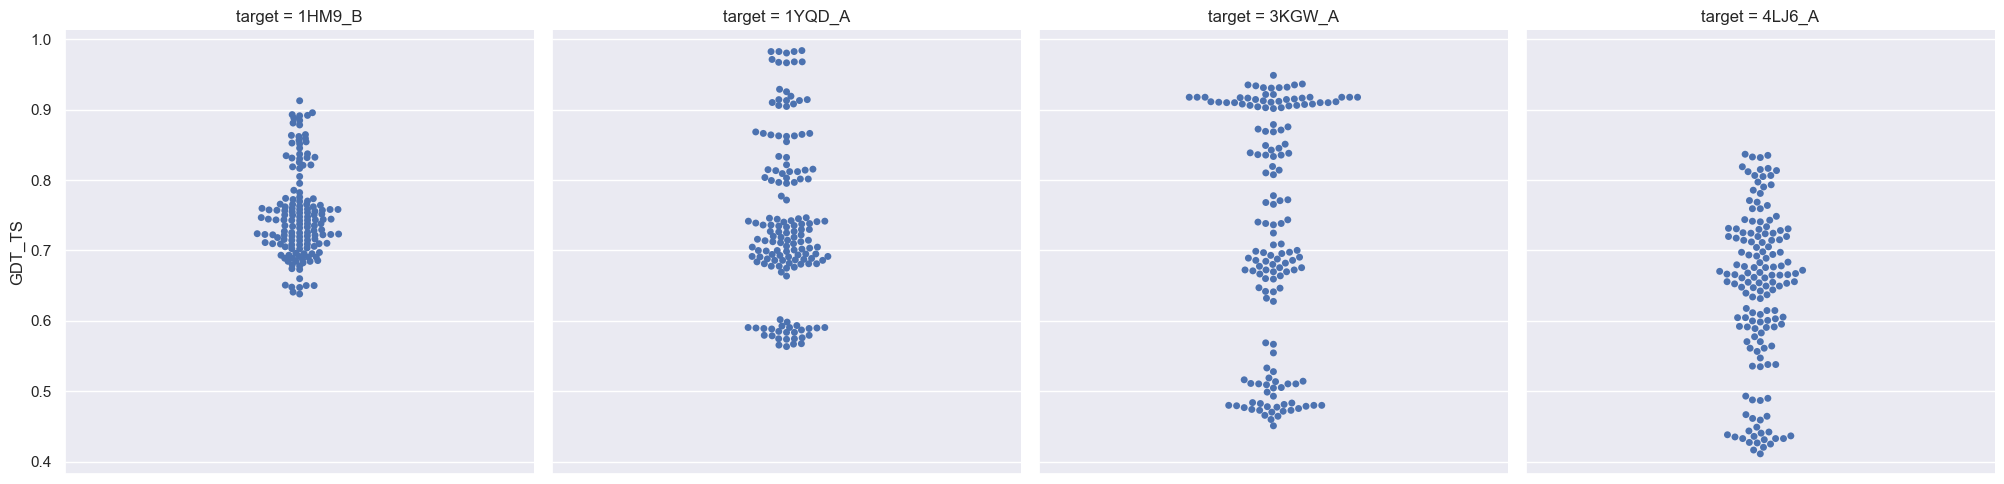

In [9]:
# Good Example
good_target = ['1HM9_B', '1YQD_A', '3KGW_A', '4LJ6_A']#'4I8H_Y']
target = good_target
data = df.query('target in @target')
sns.factorplot(data=data, y='GDT_TS', col='target', kind='swarm', col_wrap=4, col_order=target)
plt.show()

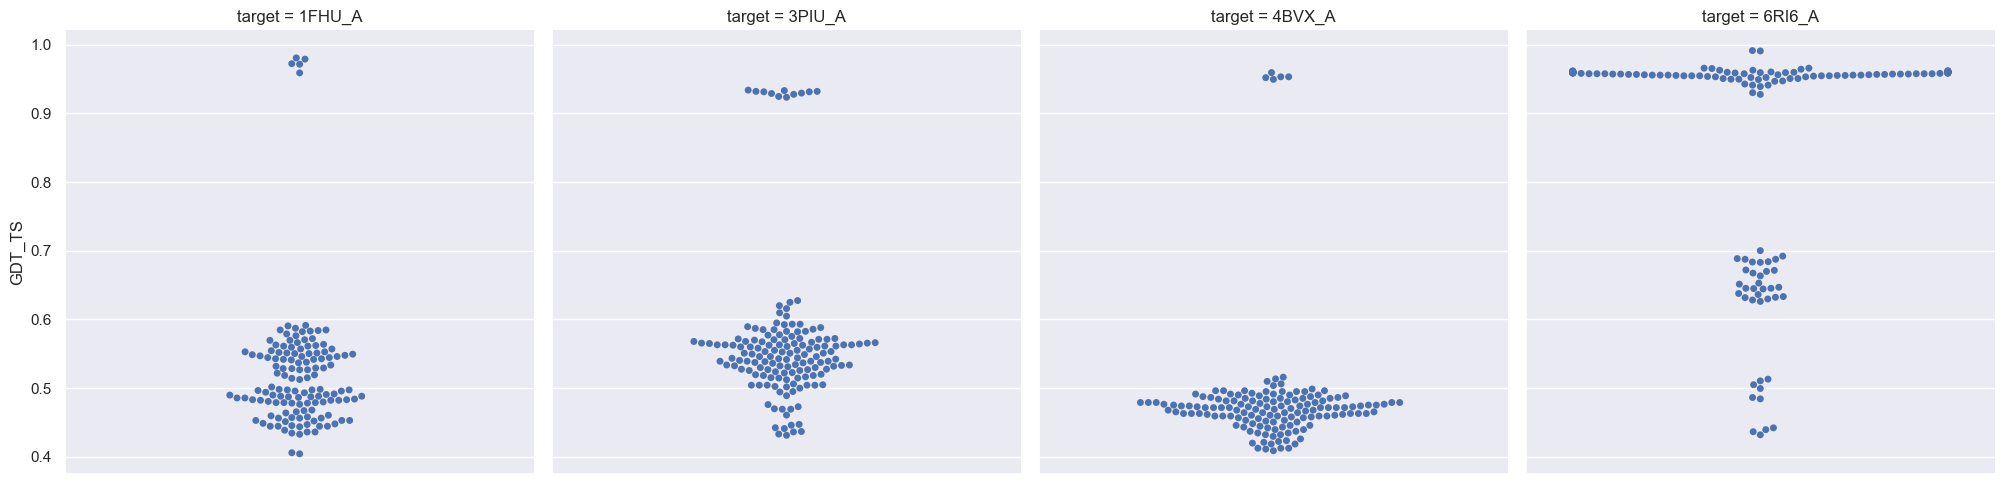

In [10]:
# Bad Example
bad_target = ['1FHU_A', '3PIU_A', '4BVX_A', '6RI6_A']
target = bad_target
data = df.query('target in @target')
sns.factorplot(data=data, y='GDT_TS', col='target', kind='swarm', col_wrap=4, col_order=target)
plt.show()

## Compact swarmplot for each target

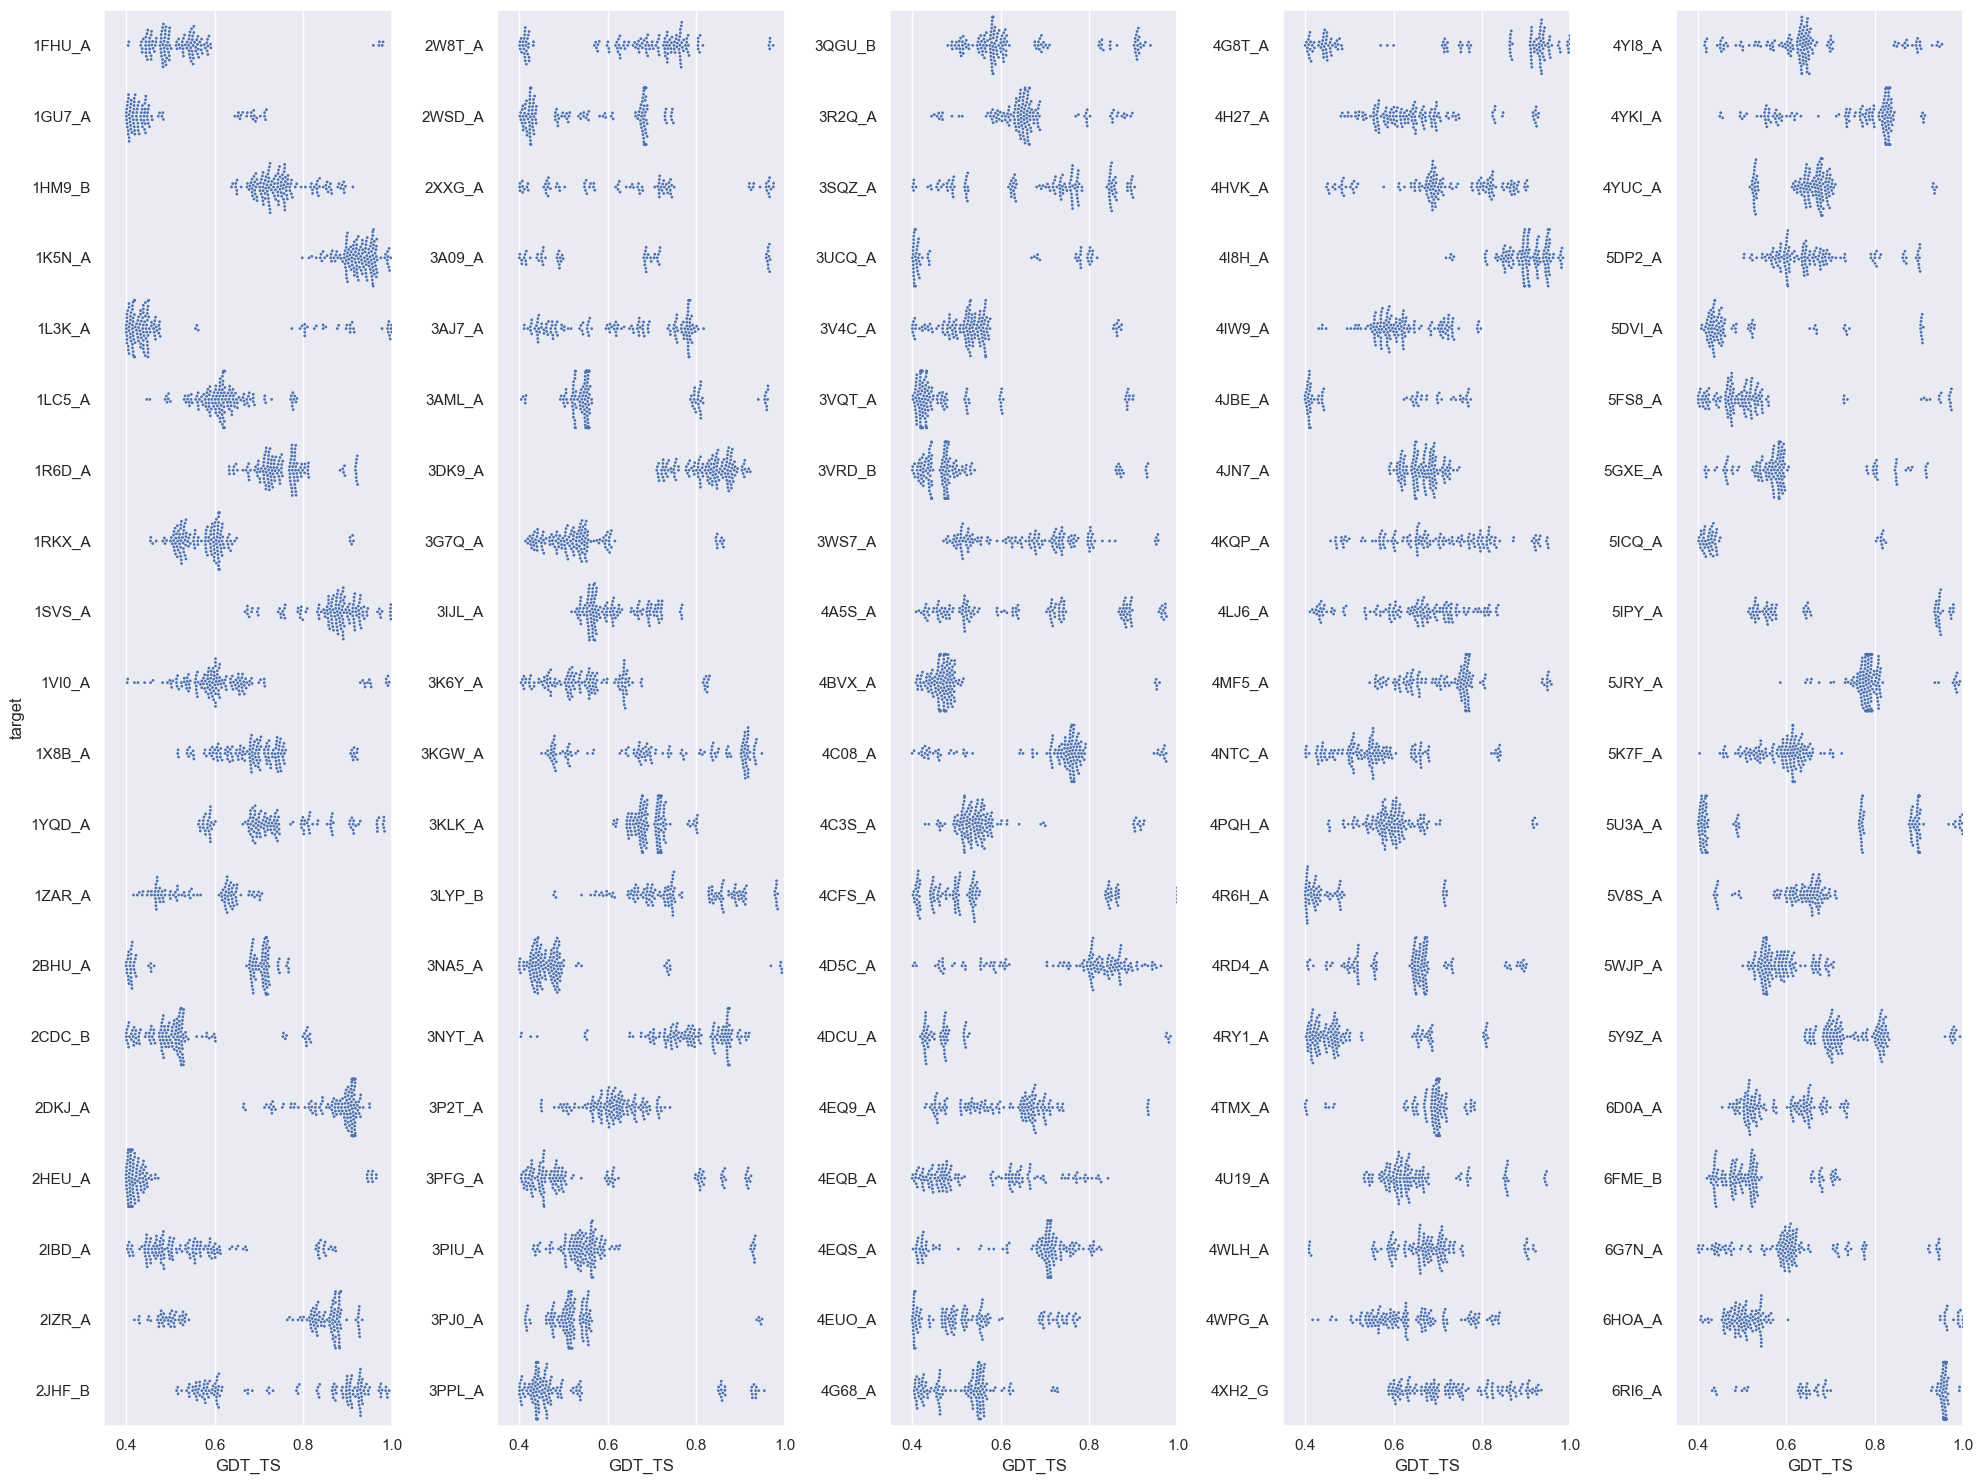

In [11]:
num_split = 5
figsize = (20, 15)
data=df
x='GDT_TS'
y='target'
hue=None
# sort target list you like
target_list = data['target'].sort_values().unique()
target_num = len(target_list)
fig, axes = plt.subplots(nrows=1, ncols=num_split, sharex=False, sharey=False, figsize=figsize)
for i in range(num_split):
    sub_target_list = target_list[i * (target_num // num_split): (i + 1) * (target_num // num_split)]
    sub_data = data.query('target in @sub_target_list')
    sns.swarmplot(data=sub_data, x=x, y=y, orient='h', hue=hue, dodge=False, ax=axes[i], size=2, color='#4c72b0')#, palette='hls')
    axes[i].set_xlim([0.35, 1])
    if i != 0:
        axes[i].set_ylabel('')
plt.tight_layout()
output_path = plot_dir / 'gdtts_swarmplot_horizontal.png'
plt.savefig(output_path)

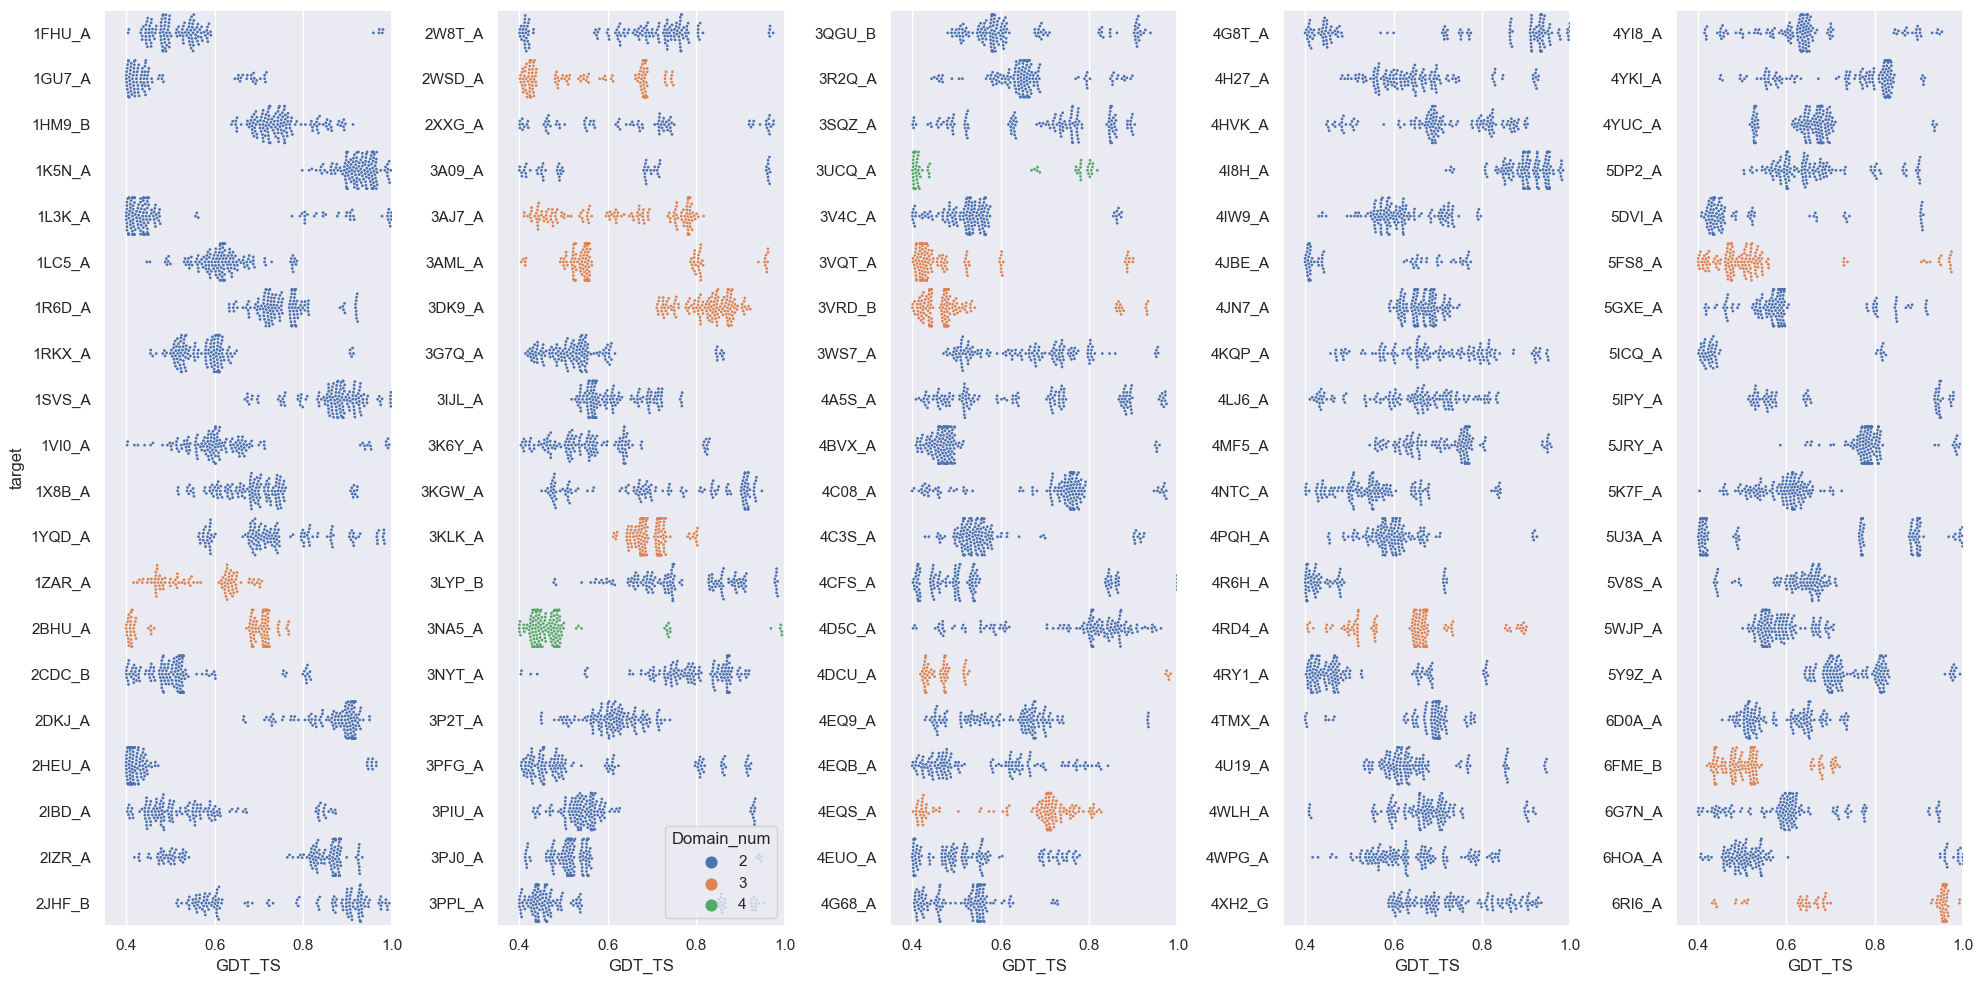

In [12]:
num_split = 5
figsize = (20, 10)
data=df
x='GDT_TS'
y='target'
hue='Domain_num'
# sort target list you like
target_list = data['target'].sort_values().unique()
target_num = len(target_list)
fig, axes = plt.subplots(nrows=1, ncols=num_split, sharex=False, sharey=False, figsize=figsize)
for i in range(num_split):
    sub_target_list = target_list[i * (target_num // num_split): (i + 1) * (target_num // num_split)]
    sub_data = data.query('target in @sub_target_list')
    sns.swarmplot(data=sub_data, x=x, y=y, orient='h', hue=hue, dodge=False, ax=axes[i], size=2)
    axes[i].set_xlim([0.35, 1])
    if i != 0:
        axes[i].set_ylabel('')
    if i != 1:
        axes[i].get_legend().remove()
plt.tight_layout()
output_path = plot_dir / 'gdtts_swarmplot_horizontal_hue_domain_num.png'
plt.savefig(output_path)

## plot the distribution of the max GDT_TS of each target

In [13]:
max_gdtts_df = df.groupby('target').apply(lambda x: x.loc[x['GDT_TS'].idxmax()])
max_gdtts_df.sort_values('GDT_TS')

model  GDT_TS  GDT_HA  TMscore  target  template  seq_len  \
target                                                                          
5WJP_A  5WJP_A_6WUP_A_2_4   0.707   0.505    0.805  5WJP_A  6WUP_A_2      249   
1ZAR_A  1ZAR_A_4GYG_A_2_2   0.707   0.500    0.874  1ZAR_A  4GYG_A_2      282   
5V8S_A  5V8S_A_1E5D_A_3_5   0.713   0.500    0.887  5V8S_A  1E5D_A_3      410   
1GU7_A  1GU7_A_2VCY_A_2_4   0.717   0.523    0.870  1GU7_A  2VCY_A_2      364   
4R6H_A  4R6H_A_4RK9_A_1_5   0.720   0.549    0.849  4R6H_A  4RK9_A_1      428   
...                   ...     ...     ...      ...     ...       ...      ...   
5U3A_A  5U3A_A_3L2L_A_1_4   0.999   0.957    0.998  5U3A_A  3L2L_A_1      496   
4G8T_A  4G8T_A_3PWI_A_1_4   0.999   0.975    0.998  4G8T_A  3PWI_A_1      464   
1L3K_A  1L3K_A_1UP1_A_1_3   1.000   0.982    0.995  1L3K_A  1UP1_A_1      196   
4CFS_A  4CFS_A_2WJ3_A_1_3   1.000   0.998    0.999  4CFS_A  2WJ3_A_1      287   
6HOA_A  6HOA_A_3G1L_A_1_2   1.000   0.982    0.997  6HOA_A  3G1L_A_1      228   

        identity  positive  coverage  ...  Exptl.  resolution  R-factor  \
target                                ...                                 
5WJP_A        77       129       233  ...    XRAY       1.570     0.180   
1ZAR_A        76       133       274  ...    XRAY       1.750     0.180   
5V8S_A       108       187       392  ...    XRAY       1.410     0.150   
1GU7_A       135       199       359  ...    XRAY       1.700     0.170   
4R6H_A       232       309       394  ...    XRAY       1.500     0.170   
...          ...       ...       ...  ...     ...         ...       ...   
5U3A_A       430       460       495  ...    XRAY       0.950     0.110   
4G8T_A       375       413       442  ...    XRAY       1.700     0.150   
1L3K_A       182       182       182  ...    XRAY       1.100     0.160   
4CFS_A       272       272       274  ...    XRAY       1.940     0.170   
6HOA_A       216       216       216  ...    XRAY       1.500     0.190   

        FreeRvalue PDB_ID Chain  Domain_num       1       2        3  
target                                                                
5WJP_A       0.210   5WJP     A           2  64.000 293.000  293.000  
1ZAR_A       0.220   1ZAR     A           3  13.000  44.000  332.000  
5V8S_A       0.180   5V8S     A           2  14.000  46.000  223.000  
1GU7_A       0.190   1GU7     A           2  22.000 231.000  268.000  
4R6H_A       0.200   4R6H     A           2  68.000 462.000 1012.000  
...            ...    ...   ...         ...     ...     ...      ...  
5U3A_A       0.120   5U3A     A           2  89.000 295.000  343.000  
4G8T_A       0.180   4G8T     A           2  74.000 223.000  268.000  
1L3K_A       0.190   1L3K     A           2 180.000 410.000  480.000  
4CFS_A       0.200   4CFS     A           2  29.000 340.000  464.000  
6HOA_A       0.210   6HOA     A           2  31.000 254.000  285.000  

[100 rows x 27 columns]

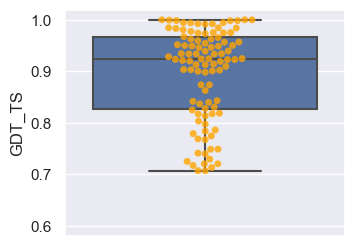

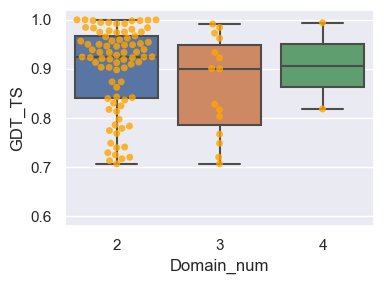

In [14]:
# Distribution of the max GDT_TS
plt.figure(figsize=(4, 3))
plt.subplots_adjust(left=0.2)
y = 'GDT_TS'
plt.ylim([0.58, 1.02])
sns.boxplot(data=max_gdtts_df, y=y)
sns.swarmplot(data=max_gdtts_df, y=y, color='orange', alpha=0.8)
output_path = plot_dir / 'max_gdtts_swarmplot.png'
plt.savefig(output_path)
plt.show()
plt.figure(figsize=(4, 3))
plt.subplots_adjust(left=0.2)
x = 'Domain_num'
plt.ylim([0.58, 1.02])
sns.boxplot(data=max_gdtts_df, x=x, y=y, order=order)
sns.swarmplot(data=max_gdtts_df, x=x, y=y, color='orange', order=order, alpha=0.8)
plt.tight_layout()
output_path = plot_dir / 'max_gdtts_swarmplot_each_domain_num.png'
plt.savefig(output_path)
plt.show()